##### - 빅데이터 분석과 활용 - 
- Regression 실습
- 화 1~2 
- 경제학과 2019110044 이한솔
- 기대 수익률 예측하기 with Regression

 : 투자자의 투자 정보 데이터(Finance_data1)를 활용해 투자자의 기대 수익률을 예측하는 선형 회귀 모델을 만들었고, 
 
 이를 기초하여 투자자 기대 수익률의 영향 요소 파악 및 투자자 기대 수익률 예측을 진행하였습니다.

    0. 개요
    1. Library & Data Import
    2. 데이터 파악 (EDA: 탐색적 데이터 분석)
        2-1. 데이터셋 기본 정보 파악
        2-2. 종속 변수(목표 변수) 탐색
        2-3. 설명 변수 탐색
        2-4. 설명변수와 종속변수 간의 관계 탐색

    3. 기대 수익률 예측 모델링: 회귀 분석
        3-1. 데이터 전처리
        3-2. 회귀 모델링
        3-3. 모델 해석
        3-4. 모델 예측 결과 및 성능 평가

In [1]:
### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

##1. 사용할 데이터셋 가져오기 : Finance_data Dataset

In [2]:
from google.colab import files
uploaded = files.upload() # Finance_data1.csv

Saving Finance_data1.csv to Finance_data1.csv


In [3]:
df=pd.read_csv('./Finance_data1.csv')

In [4]:
# 데이터셋 구성 살펴보기
df.head()

,gender,age,Factor,Duration,Invest_Monitor,Expect,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits
0,Female,34,Returns,2,Daily,20,6,3,5,1
1,Female,23,Returns,5,Weekly,40,5,6,7,3
2,Male,30,Returns,4,Daily,30,2,4,6,3
3,Male,22,Returns,1,Daily,10,7,5,1,2
4,Female,24,Returns,1,Daily,20,7,5,2,4


#### 1-1. 데이터 살펴보기 :Features Descriptions

각 변수의 의미는 다음과 같습니다:

    1. gender : 성별
    2. age : 나이
    3. Factor : 투자 시 고려 요소
    4. Duration : 투자금 예치를 원하는 기간(년)
    5. Invest_Monitor : 투자 수단 모니터링 간격(기간)
    6. Expect : 기대 수익률(%)

    * 7~10 : 해당 투자 수단을 선호하는 정도는? 
    (1:매우 선호하지 않음, 7: 매우 선호)
    7. Equity_Market : 주식시장 선호도
    8. Debentures : 채권 선호도
    9. Government_Bonds : 국채 선호도
    10. Fixed_Deposits : 정기적금 선호도

## 2. 데이터 탐색하기 (EDA: Exploratory Data Analysis)
데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 각 변수의 특성


In [5]:
sns.set_style('darkgrid') #그래프 배경 설정

#### 2-1. 데이터 셋의 기본 정보 파악하기

In [6]:
### 데이터 셋 구조 보기
df.shape #(행 40개, 열 10개)

(40, 10)

In [7]:
### 결측치 : 비어있는 데이터 찾기
df.isnull().sum() #결측치 없음

gender              0
age                 0
Factor              0
Duration            0
Invest_Monitor      0
Expect              0
Equity_Market       0
Debentures          0
Government_Bonds    0
Fixed_Deposits      0
dtype: int64

In [8]:
### data type 확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            40 non-null     object
 1   age               40 non-null     int64 
 2   Factor            40 non-null     object
 3   Duration          40 non-null     int64 
 4   Invest_Monitor    40 non-null     object
 5   Expect            40 non-null     int64 
 6   Equity_Market     40 non-null     int64 
 7   Debentures        40 non-null     int64 
 8   Government_Bonds  40 non-null     int64 
 9   Fixed_Deposits    40 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 3.2+ KB


In [9]:
# 해설))
# 10개의 열변수 중 
# age(나이), Duration(투자금 예치를 원하는 기간:년),
# Expect(기대 수익률:%), Equity_Market(주식시장 선호도), 
# Debentures(채권 선호도), Government_Bonds(국채 선호도), Fixed_Deposits(정기적금 선호도)는 정수형이고,
# 나머지는 문자형(범주형) 변수이다.

In [10]:
### 숫자형 변수만 뽑아서 기본 통계 나타내기.
df.describe()

,age,Duration,Expect,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.900000,25.500000,4.525000,2.250000,3.350000,4.425000
std,3.560467,1.150251,8.458041,1.131994,1.675617,1.369072,1.795828
min,21.000000,1.000000,10.000000,2.000000,1.000000,1.000000,1.000000
25%,25.750000,2.000000,20.000000,4.000000,1.000000,3.000000,3.000000
50%,27.000000,2.000000,20.000000,4.000000,1.500000,3.000000,4.500000
75%,30.000000,4.000000,30.000000,5.000000,3.000000,4.000000,5.250000
max,35.000000,5.000000,40.000000,7.000000,7.000000,7.000000,7.000000


#### 2-2 종속변수(타겟변수, y)의 탐색

    - Expect : 기대 수익률이 타겟변수가 됩니다. 투자자의 정보를 바탕으로 투자자의 기대 수익률을 맞출 것이기 때문입니다.

In [11]:
### Expect의 기초 통계량을 다시 살펴본다.

df['Expect'].describe()

count    40.000000
mean     25.500000
std       8.458041
min      10.000000
25%      20.000000
50%      20.000000
75%      30.000000
max      40.000000
Name: Expect, dtype: float64

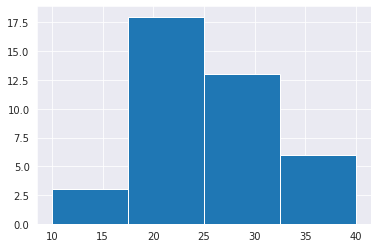

In [12]:
### 시각화를 통해 데이터의 분포 파악

df['Expect'].hist(bins=4) #히스토그램

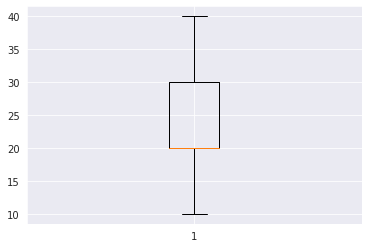

In [13]:
plt.boxplot(df['Expect']) #상자그림
plt.show()

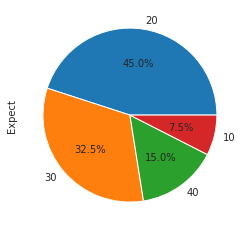

In [14]:
df['Expect'].value_counts().plot.pie(autopct='%1.1f%%')

In [15]:
# 해설) Expect는 10~40 사이에 분포되어있고 20의 비중이 45%로 가장 크다.

#### 2-3 설명변수(독립변수, features, attributes, x) 살펴보기
- 각 설명변수의 특징 파악하기(시각화)
    

In [16]:
# df 데이터를 복사해서 df2 데이터에 할당
df2 = df.copy()

##### 2.3.1 성별(gender)


In [17]:
### 성별(gender)
df2['gender'].value_counts() # value_counts() :열의 고유값과 개수 반환

Male      25
Female    15
Name: gender, dtype: int64

In [18]:
df2[['gender','Expect']].groupby(['gender']).mean()

,Expect
gender,
Female,25.333333
Male,25.600000


In [19]:
# 해설)) 여성의 평균 기대 수익률은 약 25%, 남성의 평균 기대 수익률은 약 26%.
# 성별과 기대 수익률은 관련이 없어 보인다.

##### 2.3.2 나이(age)


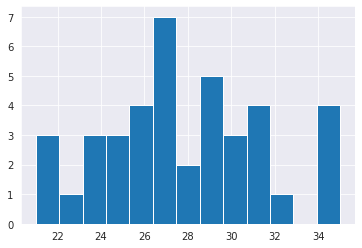

In [20]:
### 나이(age)
df2['age'].hist(bins=13) #히스토그램

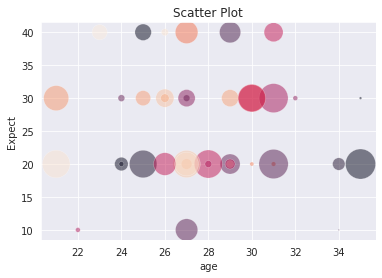

In [21]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='age', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

In [22]:
# 해설) 산점도에서 나이와 기대 수익률 사이의 상관관계가 나타나지 않으므로 서로 관련이 없다고 추측된다.

##### 2.3.3 투자 시 고려 요소(Factor)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


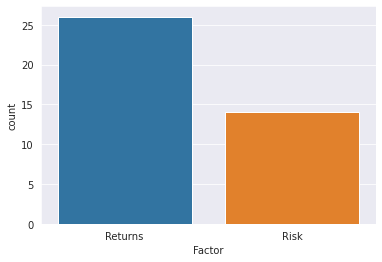

In [23]:
### 투자 시 고려 요소(Factor)
sns.countplot('Factor',data=df2) #막대그래프

In [24]:
# df 데이터에서 Expect의 최댓값은 40(%)이고 최솟값은 10(%)이었음.
# 투자시 수익(Returns)을 고려하면 일반적으로 기대 수익률이 높아진다고 볼 수 있다. => 임의의 숫자 40(%)으로 변환
# 투자시 위험(Risk)을 고려하면 일반적으로 기대 수익률이 낮아진다고 볼 수 있다. => 임의의 숫자 10(%)으로 변환

df2['Factor_num'] = 0 # df2에 'Factor_num' 열을 만들어 0을 기본값으로 할당
df2.loc[df2['Factor'] == 'Returns', 'Factor_num'] = 40 # Factor에서 'Returns'를 찾으면 Factor_num에 40을 대신 넣음
df2.loc[df2['Factor'] == 'Risk', 'Factor_num'] = 10 # Factor에서 'Risk'를 찾으면 Factor_num에 10을 대신 넣음

In [25]:
pd.crosstab(df2.Factor_num, df2.Expect).T.style.background_gradient(cmap='summer_r')
# 크로스탭을 이용하여 Factor_num열의 세부정보를 본다.

Factor_num,10,40
Expect,,
10,0,3
20,6,12
30,7,6
40,1,5


In [26]:
df2[['Factor_num','Expect']].groupby(['Factor_num']).mean()

,Expect
Factor_num,
10,26.428571
40,25.000000


In [27]:
# 해설)) Factor_num이 10(Risk)일 때 기대 수익률은 약 26%이고, 40(Returns)일 때 기대 수익률은 약 25%이다.
# Factor(투자 시 고려요소)와 Expect(기대 수익률)는 뚜렷한 상관관계가 보이지 않는다.

##### 2.3.4 투자금 예치를 원하는 기간(년) (Duration)


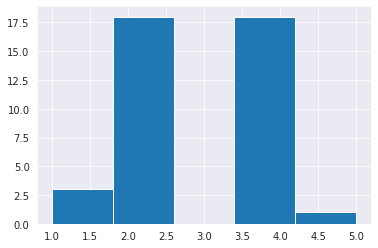

In [28]:
### 투자금 예치를 원하는 기간(년) (Duration)
df2['Duration'].hist(bins=5) #히스토그램

In [29]:
df2[['Duration','Expect']].groupby(['Duration']).mean()

,Expect
Duration,
1,13.333333
2,19.444444
4,32.777778
5,40.000000


In [30]:
# 해설)) Duration(투자금 예치를 원하는 기간)이 길어질수록 Expect(기대 수익률)는 증가한다.
# 두 변수는 양의 상관관계를 보인다.

##### 2.3.5 투자 수단 모니터링 간격(Invest_Monitor)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


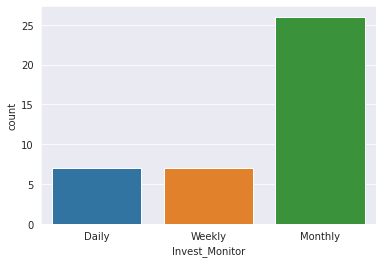

In [31]:
### 투자 수단 모니터링 간격(Invest_Monitor)
sns.countplot('Invest_Monitor',data=df2) #막대그래프

In [32]:
# df 데이터에서 Expect의 값은 10(%), 20(%), 30(%), 40(%)였음.  
# 투자시 한 달 간격(Monthly)으로 모니터링하면 한 달에 약 1번 모니터링하는 것이다. => 숫자 1(번)으로 변환
# 투자시 일주일 간격(Weekly)으로 모니터링하면 한 달에 약 5번 모니터링하는 것이다. => 숫자 5(번)으로 변환
# 투자시 하루 간격(Daily)으로 모니터링하면 한 달에 약 30번 모니터링하는 것이다. => 숫자 30(번)으로 변환

df2['Invest_Monitor_num'] = 0 # df2에 'Invest_Monitor_num' 열을 만들어 0을 기본값으로 할당
df2.loc[df2['Invest_Monitor'] == 'Monthly', 'Invest_Monitor_num'] = 1 # Invest_Monitor에서 'Montly'를 찾으면 Invest_Monitor_num에 1을 대신 넣음
df2.loc[df2['Invest_Monitor'] == 'Weekly', 'Invest_Monitor_num'] = 5 # Invest_Monitor에서 'Weekly'를 찾으면 Invest_Monitor_num에 5을 대신 넣음
df2.loc[df2['Invest_Monitor'] == 'Daily', 'Invest_Monitor_num'] = 30 # Invest_Monitor에서 'Daily'를 찾으면 Invest_Monitor_num에 30을 대신 넣음

In [33]:
pd.crosstab(df2.Invest_Monitor_num, df2.Expect).T.style.background_gradient(cmap='summer_r')
# 크로스탭을 이용하여 Invest_Monitor_num열의 세부정보를 본다.

Invest_Monitor_num,1,5,30
Expect,,,
10,0,0,3
20,11,4,3
30,10,2,1
40,5,1,0


In [34]:
df2[['Invest_Monitor_num','Expect']].groupby(['Invest_Monitor_num']).mean()

,Expect
Invest_Monitor_num,
1,27.692308
5,25.714286
30,17.142857


In [35]:
# 해설)) 
# Invest_Monitor_num이
# 1(Monthly)일 때 기대 수익률은 약 28%이고,
# 5(Weekly)일 때 기대 수익률은 약 26%이고,
# 30(Daily)일 때 기대 수익률은 약 17%이다.

# Invest_Monitor_num(투자 수단 모니터링 간격)와 Expect(기대 수익률)는 음의 상관관계가 있는 것 같다.

##### 2.3.6 주식시장 선호도(Equity_Market)

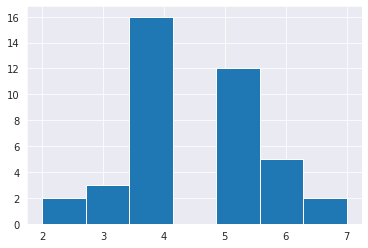

In [36]:
### 주식시장 선호도(Equity_Market)
df2['Equity_Market'].hist(bins=7) #히스토그램

In [37]:
df2[['Equity_Market','Expect']].groupby(['Equity_Market']).mean()

,Expect
Equity_Market,
2,30.000000
3,16.666667
4,28.125000
5,27.500000
6,20.000000
7,15.000000


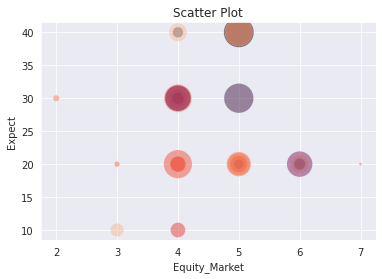

In [38]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Equity_Market', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

In [39]:
# 해설) Equity_Market(주식시장 선호도)와 Expect(기대 수익률)는 뚜렷한 상관관계가 보이지 않는 것 같다.

##### 2.3.7 채권 선호도(Debentures)

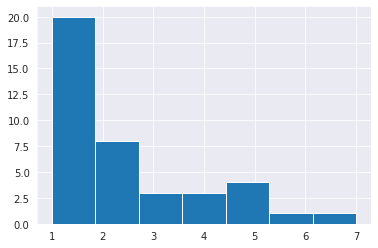

In [40]:
### 채권 선호도(Debentures)
df2['Debentures'].hist(bins=7) #히스토그램

In [41]:
df2[['Debentures','Expect']].groupby(['Debentures']).mean()

,Expect
Debentures,
1,26.500000
2,26.250000
3,30.000000
4,26.666667
5,15.000000
6,40.000000
7,10.000000


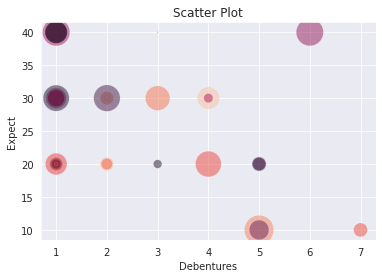

In [42]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Debentures', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

In [43]:
# 해설) Debentures(채권 선호도)와 Expect(기대 수익률)는 뚜렷한 상관관계가 보이지 않는 것 같다.

##### 2.3.8 국채 선호도(Government_Bonds)

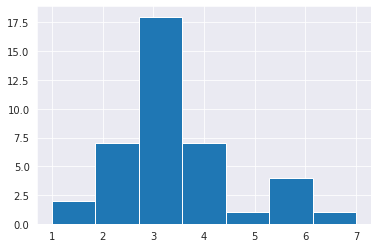

In [44]:
### 국채 선호도(Government_Bonds)
df2['Government_Bonds'].hist(bins=7) #히스토그램

In [45]:
df2[['Government_Bonds','Expect']].groupby(['Government_Bonds']).mean()

,Expect
Government_Bonds,
1,25.000000
2,25.714286
3,26.666667
4,24.285714
5,20.000000
6,20.000000
7,40.000000


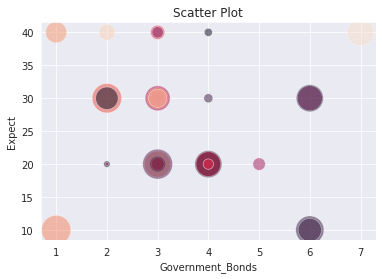

In [46]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Government_Bonds', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

In [47]:
# 해설) Government_Bonds(국채 선호도)와 Expect(기대 수익률)는 뚜렷한 상관관계가 보이지 않는 것 같다.

##### 2.3.9 정기적금 선호도(Fixed_Deposits)

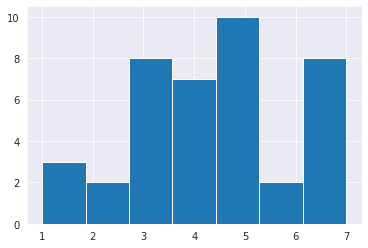

In [48]:
### 정기적금 선호도(Fixed_Deposits)
df2['Fixed_Deposits'].hist(bins=7) #히스토그램

In [49]:
df2[['Fixed_Deposits','Expect']].groupby(['Fixed_Deposits']).mean()

,Expect
Fixed_Deposits,
1,13.333333
2,20.000000
3,27.500000
4,22.857143
5,26.000000
6,35.000000
7,28.750000


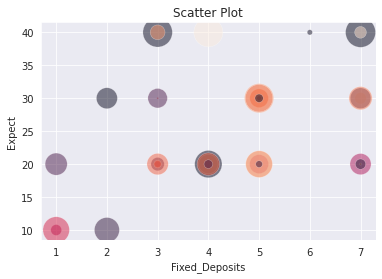

In [50]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Fixed_Deposits', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

In [51]:
# 해설) Fixed_Deposits(정기적금 선호도)와 Expect(기대 수익률)는 뚜렷한 상관관계가 보이지 않는 것 같다.

#### 2-4. 설명변수(x) 와 종속변수(y) 간의 관계 탐색
- 상관계수를 통해 변수 간의 정확한 상관관계 파악

In [52]:
df2.head()

,gender,age,Factor,Duration,Invest_Monitor,Expect,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,Factor_num,Invest_Monitor_num
0,Female,34,Returns,2,Daily,20,6,3,5,1,40,30
1,Female,23,Returns,5,Weekly,40,5,6,7,3,40,5
2,Male,30,Returns,4,Daily,30,2,4,6,3,40,30
3,Male,22,Returns,1,Daily,10,7,5,1,2,40,30
4,Female,24,Returns,1,Daily,20,7,5,2,4,40,30


In [53]:
### Person 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표
### -1 에서 1 사이의 값을 가진다는 특징
### 1일 때는 완전 양의 상관(perfect positive correlation), -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보임

# 수치형 변수에 대해 상관관계 분석
cols = ['age', 'Duration', 'Expect', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'Factor_num', 'Invest_Monitor_num']

corr = df2[cols].corr(method = 'pearson')
corr

,age,Duration,Expect,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,Factor_num,Invest_Monitor_num
age,1.000000,-0.061357,-0.081739,-0.246840,-0.326638,0.093632,0.033685,-0.011927,-0.001844
Duration,-0.061357,1.000000,0.901362,-0.431264,-0.159643,0.087925,0.331428,-0.156904,-0.425784
Expect,-0.081739,0.901362,1.000000,-0.228975,-0.262337,-0.059786,0.399238,-0.081587,-0.468585
Equity_Market,-0.246840,-0.431264,-0.228975,1.000000,-0.016898,-0.237420,-0.238705,0.157090,0.022212
Debentures,-0.326638,-0.159643,-0.262337,-0.016898,1.000000,0.430323,-0.470791,0.300951,0.712524
Government_Bonds,0.093632,0.087925,-0.059786,-0.237420,0.430323,1.000000,-0.531359,0.306301,0.243424
Fixed_Deposits,0.033685,0.331428,0.399238,-0.238705,-0.470791,-0.531359,1.000000,-0.208387,-0.534180
Factor_num,-0.011927,-0.156904,-0.081587,0.157090,0.300951,0.306301,-0.208387,1.000000,0.212826
Invest_Monitor_num,-0.001844,-0.425784,-0.468585,0.022212,0.712524,0.243424,-0.534180,0.212826,1.000000


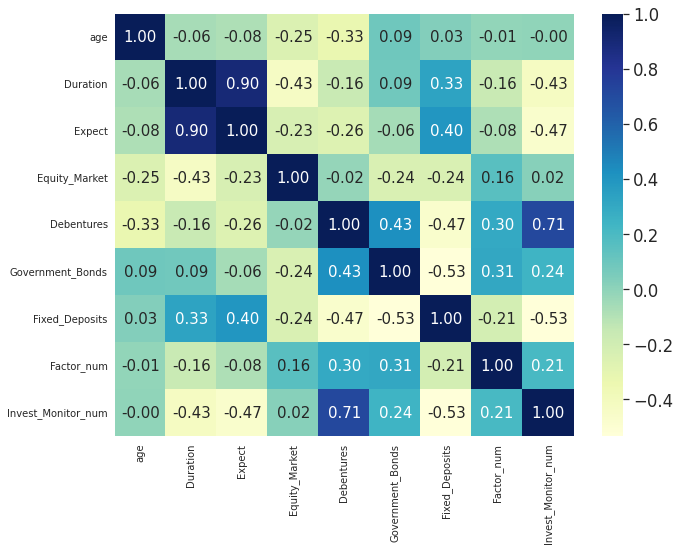

In [54]:
# 상관관계 Heatmap

fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정 
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "YlGnBu")
plt.tight_layout()
plt.show()

In [55]:
### 해설) 
### 우리의 관심사인 target variable **“Expect - 기대 수익률”**과 다른 변수간의 상관관계를 살펴보면,
###“Expect - 기대 수익률”은
###“Duration - 투자금 예치를 원하는 기간"과 <<강한 양의 상관관계(0.9)>>를 보이고,
### "Fixed_Deposits - 정기적금 선호도"와 <<약한 양의 상관관계(0.4)>>를 보이고,
### "Invest_Monitor_num - 투자 수단 모니터링 간격(변환값)"과 <<약한 음의 상관관계(-0.47)>>를 보인다.  

##### 2.4.1 Expect(기대 수익률) - Duration(투자금 예치를 원하는 기간)의 관계

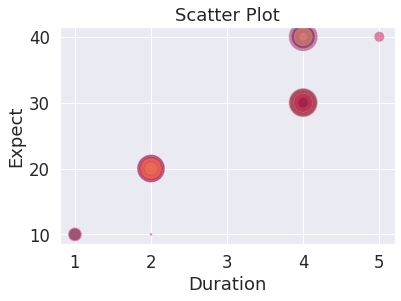

In [56]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Duration', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

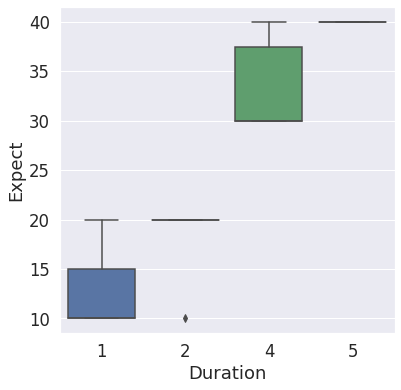

In [57]:
## 투자자의 투자금 예치를 원하는 기간 별 기대수익률 특징 (boxplot 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='Duration', y='Expect', data=df2)

In [58]:
### 해설))
### 기대 수익률이 투자금 예치를 원하는 기간과 양의 상관관계(positive correlation)를 갖고 있습니다. 
### 즉, 투자금 예치를 원하는 기간이 긴 투자자의 기대 수익률이 상대적으로 높은 경향이 있습니다.

##### 2.4.2 Expect(기대 수익률) - Invest_Monitor_num(투자 수단 모니터링 간격(변환값))의 관계

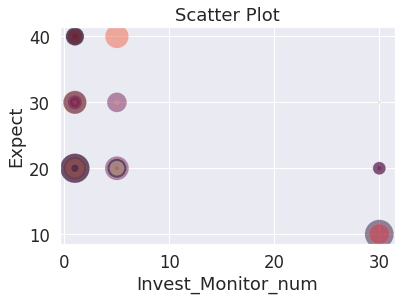

In [59]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Invest_Monitor_num', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

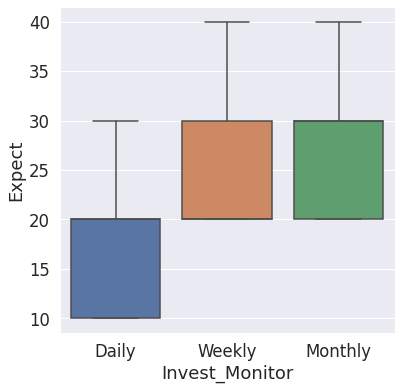

In [60]:
## 투자자의 투자 수단 모니터링 간격 별 기대수익률 특징 (boxplot 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='Invest_Monitor', y='Expect', data=df2)

In [61]:
### 해설))
### 기대 수익률이 투자 수단 모니터링 간격(변환값)과 음의 상관관계(negative correlation)를 갖고 있습니다. 
### 즉, 투자 수단 모니터링 간격이 짧은 투자자의 기대 수익률이 상대적으로 높은 경향이 있습니다.

##### 2.4.3 Expect(기대 수익률) - Fixed_Deposits(정기적금 선호도)의 관계

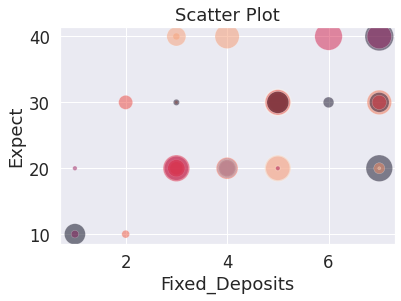

In [62]:
# scatter plot(산점도)
n = 40
area = (30 * np.random.rand(n))**2
colors = np.random.rand(n)

sns.scatterplot(data=df2, x='Fixed_Deposits', y='Expect', markers='o', s=area, c=colors, alpha=0.5)
plt.title('Scatter Plot')
plt.show()

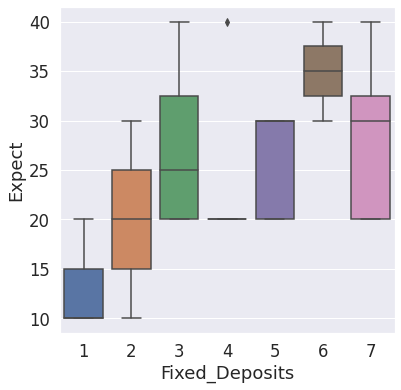

In [63]:
## 투자자의 정기적금 선호도 별 기대수익률 특징 (boxplot 이용)
fig = plt.figure(figsize = (6, 6))
sns.boxplot(x='Fixed_Deposits', y='Expect', data=df2)

In [64]:
### 해설))
### 기대 수익률이 정기적금 선호도와 양의 상관관계(positive correlation)를 갖고 있습니다. 
### 즉, 정기적금 선호도가 높은 투자자의 기대 수익률이 상대적으로 높은 경향이 있습니다.

### 3. 기대 수익률 예측 모델링: 회귀분석
- 설명변수들을 활용하여 투자자 별 기대 수익률을 예측하는 회귀 모델을 만들어 보기

#### 3-1 데이터 전처리
- 먼저 Feature 들의 scale 차이를 없애기 위해 수치형 Feature에 대해서 표준화 진행

In [65]:
df2.head()

,gender,age,Factor,Duration,Invest_Monitor,Expect,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,Factor_num,Invest_Monitor_num
0,Female,34,Returns,2,Daily,20,6,3,5,1,40,30
1,Female,23,Returns,5,Weekly,40,5,6,7,3,40,5
2,Male,30,Returns,4,Daily,30,2,4,6,3,40,30
3,Male,22,Returns,1,Daily,10,7,5,1,2,40,30
4,Female,24,Returns,1,Daily,20,7,5,2,4,40,30


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              40 non-null     object
 1   age                 40 non-null     int64 
 2   Factor              40 non-null     object
 3   Duration            40 non-null     int64 
 4   Invest_Monitor      40 non-null     object
 5   Expect              40 non-null     int64 
 6   Equity_Market       40 non-null     int64 
 7   Debentures          40 non-null     int64 
 8   Government_Bonds    40 non-null     int64 
 9   Fixed_Deposits      40 non-null     int64 
 10  Factor_num          40 non-null     int64 
 11  Invest_Monitor_num  40 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 3.9+ KB


In [67]:
### Expect(종속변수)를 제외한 모든 수치형 변수에 대해서 표준화를 진행합니다.

from sklearn.preprocessing import StandardScaler # sklearn : 머신러닝 모듈 라이브러리

scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['age', 'Duration', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'Factor_num', 'Invest_Monitor_num']
df2[scale_columns] = scaler.fit_transform(df2[scale_columns])

In [68]:
df2.head()

,gender,age,Factor,Duration,Invest_Monitor,Expect,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,Factor_num,Invest_Monitor_num
0,Female,1.763528,Returns,-0.792406,Daily,20,1.319610,0.453298,1.220549,-1.931494,0.733799,2.150607
1,Female,-1.365312,Returns,1.848947,Weekly,40,0.424959,2.266492,2.700003,-0.803614,0.733799,-0.164363
2,Male,0.625768,Returns,0.968496,Daily,30,-2.258993,1.057696,1.960276,-0.803614,0.733799,2.150607
3,Male,-1.649752,Returns,-1.672857,Daily,10,2.214261,1.662094,-1.738358,-1.367554,0.733799,2.150607
4,Female,-1.080872,Returns,-1.672857,Daily,20,2.214261,1.662094,-0.998631,-0.239674,0.733799,2.150607


In [69]:
df2[scale_columns].head()

,age,Duration,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,Factor_num,Invest_Monitor_num
0,1.763528,-0.792406,1.319610,0.453298,1.220549,-1.931494,0.733799,2.150607
1,-1.365312,1.848947,0.424959,2.266492,2.700003,-0.803614,0.733799,-0.164363
2,0.625768,0.968496,-2.258993,1.057696,1.960276,-0.803614,0.733799,2.150607
3,-1.649752,-1.672857,2.214261,1.662094,-1.738358,-1.367554,0.733799,2.150607
4,-1.080872,-1.672857,2.214261,1.662094,-0.998631,-0.239674,0.733799,2.150607


- **training set(모델 학습) / test set(모델 예측 성능 검증) 나누기**

In [70]:
### features for linear regression model

In [71]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df2[scale_columns]
y = df2['Expect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
X_train.shape, y_train.shape

((32, 8), (32,))

In [73]:
X_test.shape, y_test.shape

((8, 8), (8,))

In [74]:
y_train
### Expect 값을 의미

19    30
26    30
32    40
17    20
30    10
36    20
33    20
28    20
4     20
14    20
10    30
35    30
23    30
24    40
34    20
20    30
18    20
25    30
6     30
13    20
7     30
38    20
1     40
16    20
0     20
15    20
5     20
11    20
9     40
8     20
12    20
37    40
Name: Expect, dtype: int64

In [75]:
X_train

,age,Duration,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,Factor_num,Invest_Monitor_num
19,-0.511992,0.968496,-0.469692,-0.151099,-0.258904,1.452145,-1.362770,-0.534758
26,-0.511992,0.968496,-0.469692,-0.151099,-0.258904,1.452145,0.733799,-0.534758
32,-0.227552,0.968496,-0.469692,-0.755497,-0.258904,1.452145,0.733799,-0.534758
17,-0.227552,-0.792406,1.319610,-0.755497,0.480822,-0.803614,0.733799,-0.534758
30,-0.227552,-0.792406,-1.364343,2.870890,1.960276,-1.931494,0.733799,2.150607
36,0.625768,-0.792406,-0.469692,-0.755497,-0.258904,1.452145,0.733799,-0.534758
33,-0.511992,-0.792406,0.424959,-0.151099,0.480822,1.452145,0.733799,-0.534758
28,0.341328,-0.792406,0.424959,-0.151099,-0.258904,1.452145,0.733799,-0.534758
4,-1.080872,-1.672857,2.214261,1.662094,-0.998631,-0.239674,0.733799,2.150607
14,-0.796432,-0.792406,0.424959,-0.755497,-0.258904,-0.239674,0.733799,-0.534758


- **다중공산성**

    - 회귀 분석에서 하나의 feature(예측 변수)가 다른 feature와의 상관 관계가 높으면 (즉, 다중공선성이 존재하면), 회귀 분석 시 부정적인 영향을 미칠 수 있기 때문에, 모델링 하기 전에 먼저 다중공선성의 존재 여부를 확인해야합니다.
    - 보통 다중공선성을 판단할 때 VIF값을 확인합니다. 일반적으로, VIF > 10인 feature들은 다른 변수와의 상관관계가 높아, 다중공선성이 존재하는 것으로 판단합니다. 즉, VIF > 10인 feature들은 설명변수에서 제거하는 것이 좋을 수도 있습니다.

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 
### 소수점 첫째자리까지 표시. 즉, 소수점 둘째짜리에서 반올림

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,features,VIF Factor
0,age,1.7
1,Duration,1.6
2,Equity_Market,1.4
3,Debentures,5.2
4,Government_Bonds,3.9
5,Fixed_Deposits,2.6
6,Factor_num,1.4
7,Invest_Monitor_num,3.8


In [77]:
### 해설) VIF값을 확인해보면, 모든 변수의 VIF값이 다 10 이하다.
### 따라서 다중공선성 문제가 존재하지 않아 모든 feature을 활용하여 회귀 모델링 진행

#### 3-2 회귀 모델링
- 먼저 Training set에서 선형 회귀 예측 모델을 학습
- 그 다음 도출된 모델을 Test set에 적용해 기대 수익률(“Expect”)을 예측
- 이 결과는 실제 “Expect” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용


In [78]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

#### 3-3 모델 해석하기
- 각 feature, 설명변수, x, 컬럼에 대한 회귀계수를 확인

In [79]:
### print coef : 계수 출력
print(lr.coef_)

[-0.35516714  8.63624893  1.54143914 -0.71004398 -1.89350977  0.07600075
  1.27899214  0.56815718]


In [80]:
### "feature - coefficients" DataFrame 만들기
### zip : 리스트 2개를 하나로 묶음.(결과는 튜플)

coefs = pd.DataFrame(zip(df2[scale_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,age,-0.355167
1,Duration,8.636249
2,Equity_Market,1.541439
3,Debentures,-0.710044
4,Government_Bonds,-1.893510
5,Fixed_Deposits,0.076001
6,Factor_num,1.278992
7,Invest_Monitor_num,0.568157


In [81]:
### 크기 순서대로 나열(내림차순, 절대값 기준)
### 절대값 기준 함수: coefficients.abs().sort_values 

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
1,Duration,8.636249
4,Government_Bonds,-1.893510
2,Equity_Market,1.541439
6,Factor_num,1.278992
3,Debentures,-0.710044
7,Invest_Monitor_num,0.568157
0,age,-0.355167
5,Fixed_Deposits,0.076001


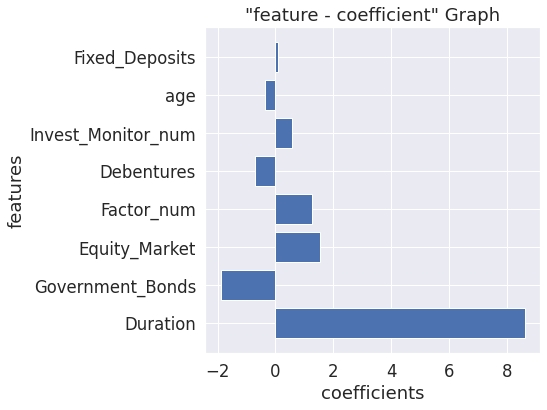

In [82]:
### coefficients 를 시각화

### figure size
plt.figure(figsize = (6, 6))

### bar plot : 수평 막대 그래프
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

- **유의성 검정**

: 통계에서 변수가 유의한지 검정


In [83]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 상수항 결합(bias augmentation)작업 : 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것
### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다. 

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Expect   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     20.72
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.77e-09
Time:                        18:27:11   Log-Likelihood:                -77.791
No. Observations:                  32   AIC:                             173.6
Df Residuals:                      23   BIC:                             186.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.9611      0.623     41.683      0.000      24.673      27.250
age                   -0.3552      0.775     -0.458      0.651      -1.958       1.248
Duration               8.6362      0.786     10.987      0.000       7.010      10.262
Equity_Market          1.5414      0.728      2.117      0.045       0.035       3.048
Debentures            -0.7100      1.359     -0.523      0.606      -3.520       2.100
Government_Bonds      -1.8935      1.427     -1.327      0.198      -4.846       1.059
Fixed_Deposits         0.0760      0.955      0.080      0.937      -1.900       2.052
Factor_num             1.2790      0.666      1.919      0.067      -0.099       2.657
Invest_Monitor_num     0.5682      1.290      0.440      0.664      -2.101       3.238
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.612
Skew:                           0.171   Prob(JB):                        0.736
Kurtosis:                       2.415   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
### 해설) 
### coef : 계수
### P>|t| : p-value를 의미. 0.05 보다 작아야 유의하다. 
### R-squred : 설명력
### R²: 결정계수(0 < R²< 1), 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다.

##### ***| 해석하기 | ***

1. 유의하지 않은 설명변수 (p-value > 0.05)
  - "age"(나이 : p-value=0.651),

  - "Debentures"(채권 : p-value=0.606),

  - "Government_Bonds" (국채 : p-value=0.198),

  - "Fixed_Deposits" (정기적금 : p-value=0.937),

  - "Factor_num"(투자시 고려 요소 : p-value=0.067),

  - "Invest_Monitor_num"(투자 수단 모니터링 간격 : p-value=0.664)

 
 2. 기대 수익률(Expect)에 Positive한 영향을 미칩니다. (coef > 0)
  - "Duration" : 투자금 예치를 원하는 기간

  - "Equity_Market" : 주식시장 선호도

  : 다른 변수의 값이 고정됐을 때, 해당 변수의 값이 클수록 기대 수익률이 높을 것입니다.

#### 3-4 모델 예측 결과 및 성능 평가
- 예측 결과를 가시화

학습한 모델을 Test set에 적용하여 y값(“Expect”)을 예측

예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화

In [85]:
### 예측 결과 시각화 (test set)
df2 = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df2 = df2.sort_values(by='actual').reset_index(drop=True)
df2.head()

### reset_index() : 인덱스 재배열
### drop=True : 기존 인덱스를 버리고 재배열

,actual,prediction
0,10,19.680917
1,10,7.285223
2,20,19.811827
3,30,28.257467
4,30,36.364719


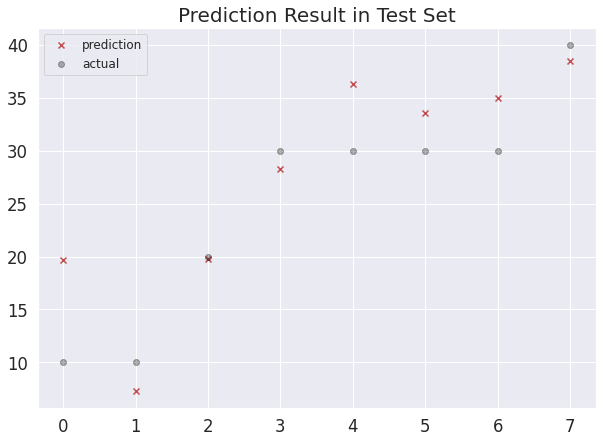

In [86]:
plt.figure(figsize=(10, 7))
plt.scatter(df2.index, df2['prediction'], marker='x', color='r')
plt.scatter(df2.index, df2['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

**- 모델 성능 평가 (R square 와 RMSE)**

In [87]:
### R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.8781371792558388
0.7698451343753561


In [88]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

2.751149511051133
4.7974458373664195


In [89]:
### 해설) Test set에서 해당 예측 모델의 R square가 약 0.77이고, RMSE가 약 4.80입니다.